## Import Library

In [7]:
%pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [8]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
import imutils
from matplotlib import pyplot as plt

## Load Data

In [9]:
IMG_DIR = '/kaggle/input/kuliah-ml-week12/'

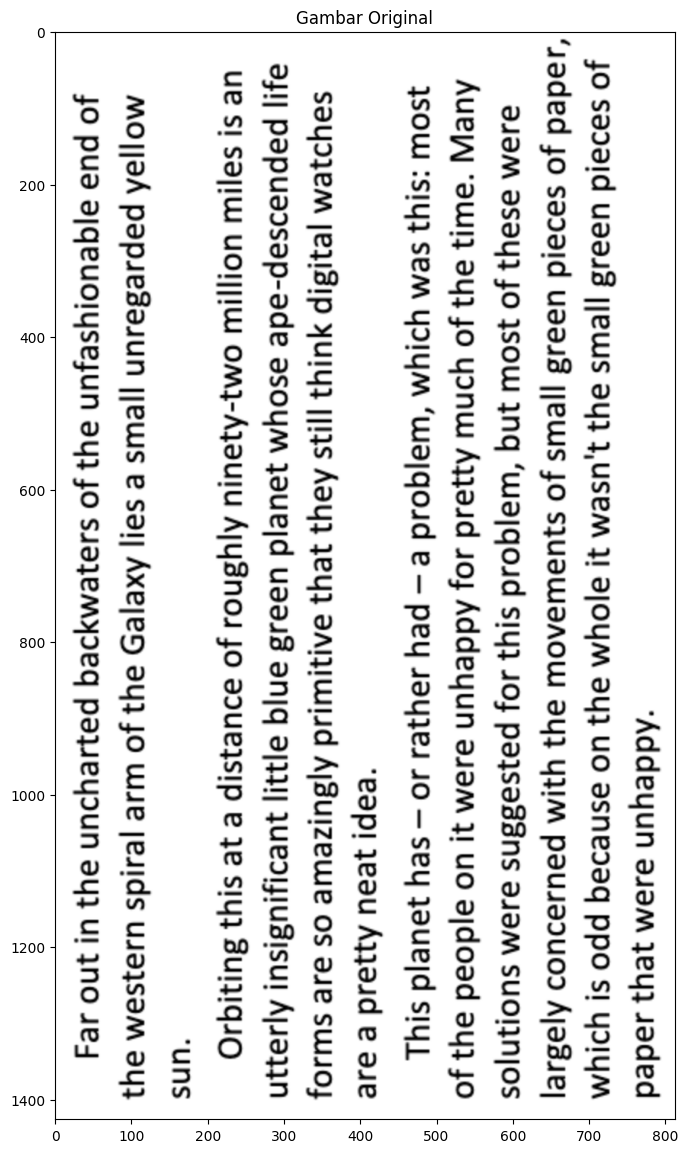

In [10]:
# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('Gambar Original')
plt.show()


## Deteksi Angle dan Scripts

In [11]:
results = pytesseract.image_to_osd(rgb_img, output_type=Output.DICT)
# display the orientation information
print("Orientasi: {}".format(results["orientation"]))
print("Rotasi {} derajat untuk menyesuaikan".format(results["rotate"]))
print("Script: {}".format(results["script"]))

Orientasi: 270
Rotasi 90 derajat untuk menyesuaikan
Script: Latin


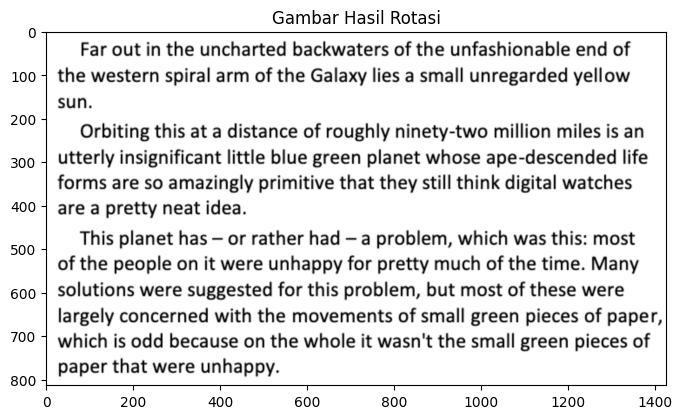

In [13]:
rotated = imutils.rotate_bound(rgb_img, angle=results["rotate"])
plt.figure(figsize=(8, 16))
plt.imshow(rotated, cmap='gray')
plt.title('Gambar Hasil Rotasi')
plt.show()

## Deteksi Tesseract

In [14]:
label = """Far out in the uncharted backwaters of the unfashionable end of the western spiral arm of the Galaxy lies a small unregarded yellow sun.
Orbiting this at a distance of roughly ninety-two million miles is an utterly insignificant little blue green planet whose ape-descended life forms are so amazingly primitive that they still think digital watches are a pretty neat idea.
This planet has - or rather had - a problem, which was this: most of the people on it were unhappy for pretty much of the time. Many solutions were suggested for this problem, but most of these were largely concerned with the movements of small green pieces of paper, which is odd because on the whole it wasn't the small green pieces of paper that were unhappy.
"""

In [15]:
print(label)

Far out in the uncharted backwaters of the unfashionable end of the western spiral arm of the Galaxy lies a small unregarded yellow sun.
Orbiting this at a distance of roughly ninety-two million miles is an utterly insignificant little blue green planet whose ape-descended life forms are so amazingly primitive that they still think digital watches are a pretty neat idea.
This planet has - or rather had - a problem, which was this: most of the people on it were unhappy for pretty much of the time. Many solutions were suggested for this problem, but most of these were largely concerned with the movements of small green pieces of paper, which is odd because on the whole it wasn't the small green pieces of paper that were unhappy.



In [17]:
custom_config = r'-l eng --oem 3 --psm 6'

result = pytesseract.image_to_string(rotated, config=custom_config)
print(result)

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



## Evaluasi Hasil

In [18]:
from difflib import SequenceMatcher
sm = SequenceMatcher(None,label,result)
sm.ratio()

0.9614082599864591

In [19]:
red = lambda text: f"\033[38;2;255;0;0m{text}\033[38;2;255;255;255m"
green = lambda text: f"\033[38;2;0;255;0m{text}\033[38;2;255;255;255m"
blue = lambda text: f"\033[38;2;0;0;255m{text}\033[38;2;255;255;255m"
black = lambda text: f"\033[38;2;0;0;0m{text}\033[38;2;255;255;255m"

def get_edits_string(old, new):
    result = ""
    codes = SequenceMatcher(a=old, b=new).get_opcodes()
    for code in codes:
        if code[0] == "equal": 
            result += black(old[code[1]:code[2]])
        elif code[0] == "delete":
            result += red(old[code[1]:code[2]])
        elif code[0] == "insert":
            result += green(new[code[3]:code[4]])
        elif code[0] == "replace":
            result += (red(old[code[1]:code[2]]) + green(new[code[3]:code[4]]))
    return result
print(get_edits_string(label,result))

Far out in the uncharted backwaters of the unfashionable end of 
the western spiral arm of the Galaxy lies a small unregarded yellow 
sun.

Orbiting this at a distance of roughly ninety-two million miles is an 
utterly insignificant little blue green planet whose ape-descended life 
forms are so amazingly primitive that they still think digital watches 
are a pretty neat idea.

This planet has - or rather had -— or rather had — a problem, which was this: most 
of the people on it were unhappy for pretty much of the time. Many 
solutions were suggested for this problem, but most of these were 
largely concerned with the movements of small green pieces of paper, 
which is odd because on the whole it wasn't the small green pieces of 
paper that were unhappy.

